# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Phase II Revisions


Use the following cell (or more if you need them) to make any needed revisions or additions to your Phase II data cleaning. If you were not recommended to make any changes, and don't have any new data sources for Phase III, you may skip this part.


In [ ]:
import json
import csv
import requests
from bs4 import BeautifulSoup
import re
def data_cleaning():

  the_file="https://data.cdc.gov/resource/5fyu-rtk3.json"
  please= requests.get(the_file)
  formatted= please.json()
  botlist=[["category", "week", ("year", "cases")]]
  new=[]
  for item in formatted:
    current=[]
    if "Botulism" in item["disease"]:
      category= (item["disease"].split())[1]
      current.append(category)
      week= item["mmwr_week"]
      current.append(week)
      for key, value in item.items():
        if "total_cases_reported_for_pervious_years" in key:
          matching= int(value)
          current.append(matching)
      botlist.append(current)
  with open("clean_json.csv", "w", newline="") as f:
      writer = csv.writer(f)
      writer.writerows(botlist) 
  return botlist






############ Function Call ############
data_cleaning()

[['category', 'week', ('year', 'cases')],
 ['total', '1', 80, 201, 195, 161, 152],
 ['foodborne', '1', 5, 31, 37, 15, 4],
 ['infant', '1', 72, 144, 138, 127, 136],
 ['other', '1', 3, 26, 20, 19, 12],
 ['foodborne', '2', 18, 31, 37, 15, 4],
 ['infant', '2', 101, 144, 138, 127, 136],
 ['total', '2', 133, 201, 195, 161, 152],
 ['other', '2', 14, 26, 20, 19, 12],
 ['infant', '3', 102, 144, 138, 127, 136],
 ['total', '3', 134, 201, 195, 161, 152],
 ['foodborne', '3', 18, 31, 37, 15, 4],
 ['other', '3', 14, 26, 20, 19, 12],
 ['infant', '4', 103, 144, 138, 127, 136],
 ['foodborne', '4', 18, 31, 37, 15, 4],
 ['other', '4', 14, 26, 20, 19, 12],
 ['total', '4', 135, 201, 195, 161, 152],
 ['infant', '5', 104, 144, 138, 127, 136],
 ['other', '5', 14, 26, 20, 19, 12],
 ['foodborne', '5', 18, 31, 37, 15, 4],
 ['total', '5', 136, 201, 195, 161, 152],
 ['other', '6', 14, 26, 20, 19, 12],
 ['infant', '6', 104, 144, 138, 127, 136],
 ['total', '6', 136, 201, 195, 161, 152],
 ['foodborne', '6', 18, 31, 37

# Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. When orginally cleaning this data set we had put the year and number of cases into tuples within each list in the list of lists. When later trying to work with that data we realized that it did not trandfer well into the pandas data frame nor was it able to meaningfully anallyzed. Therefore for the purpose of phase three we unpacked those tuples and reorganized our data.



## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

All Data sets are the same.

*  Downloaded Dataset Source #1: https://data.cdc.gov/NNDSS/NNDSS-Table-I-infrequently-reported-notifiable-dis/5fyu-rtk3
*  Web Collection #1 Source: https://www.cdc.gov/botulism/surv/2017/index.html
*  Web Collection #2 Source: https://data.cdc.gov/resource/5fyu-rtk3.json
*  Downloaded Dataset Source #2: https://data.cdc.gov/api/vies/66i6-hisz/rows.csv?



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseIII.ipynb and your Python GUI file.

## Insights

In [4]:
import pandas as pd
import numpy as np

def insight1():
    
  dataframe = pd.read_csv("downloaddata2.csv")
  dataframe = dataframe.groupby("Year").agg({"Count":"sum"}).reset_index()
  dataframe = dataframe.rename(columns = {"Count":"Cases"})
  dataframe = dataframe[94:].reset_index()
  dataframe = dataframe.loc[:,"Year":]
  dataframe = dataframe.rename(columns = {"Cases":"Total Cases"})
  dataframe= dataframe.loc[:,"Total Cases":]

  df = pd.read_csv("downloaddata1.csv")
  df.loc[:,"Population_Infection_Rate"] = df.loc[:,"Population"] * df.loc[:,"Rate"]
  df = df.groupby(["Year"]).agg({"Cases":"sum"}).reset_index()
  df = df.rename(columns = {"Cases": "CA Cases"})
  df = df[:-2]

  newdf = pd.concat([df,dataframe], axis = 1)
  newdf.loc[:,"% California"]= ((newdf.loc[:,"CA Cases"]/newdf.loc[:,"Total Cases"])*100).round(decimals=2)

  return(newdf)

insight1()

,Year,CA Cases,Total Cases,% California
0,2001,95,165,57.58
1,2002,92,125,73.60
2,2003,92,125,73.60
3,2004,92,138,66.67
4,2005,120,141,85.11
5,2006,176,167,105.39
6,2007,84,142,59.15
7,2008,83,150,55.33
8,2009,103,122,84.43
9,2010,80,111,72.07


### Insight 1 Explanation

In our first insight we used the cleaned csv files from our two csv data sets. The first of which contained information from all of the states about infection over several years and the second contained only data from california infection rates. We then compiled those into dataframes with the totals from each years and combined the dataframes to look at what percentage of each years cases came from california. In doing so we found that one of the years said that California accounted for 105% of the cases that year which is statistically impossible. This showed us the inconsistencies across government data and helped us learn a valuable lesson about the reliability and collection of data. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def insight2(filename):
  web_data1= pd.read_csv(filename)
  #creates a new row which adds together all of the columns
  web_data1.loc[4,:]= web_data1.sum(axis=0)
  #renames the Catergory of the new row to be Total
  web_data1.loc[4,"Category"]="Total"
  return(web_data1)

############ Function Call ############
newvis = insight2("webscrape.csv")
insight2("webscrape.csv")

,Category,Number of Cases,Deaths,Male,Female
0,Infant,141.0,0.0,69.0,72.0
1,Foodborne,19.0,3.0,11.0,8.0
2,Wound,19.0,0.0,15.0,4.0
3,Other,3.0,1.0,1.0,2.0
4,Total,182.0,4.0,96.0,86.0


### Insight 2 Explanation

For this insight we used the cleaned csv file that we created from the web scrapped data in phase 2. The first step was to transform that csv into a pandas dataframe. Then we added a fourth row which took the sum of each of the columns. Becuase of the nature of the sggregtae sum function, it added all of the strings in category together which is why we had to rename that cell "Ttotal". The purpose of all of this was to compare number of cases and types of infection across men and women to gain insight into how the disease impacts the sexes differently.

In [ ]:
import pandas as pd
import numpy as np
import csv

def insight3():
  with open("clean_json.csv") as projectCsv:

    finlist = []
    allData = csv.reader(projectCsv, delimiter = ",", quotechar = '"')
    dataList = list(allData)
    #adds new
  for line in dataList[:1]:
    item = line[0:2] + ["2017, Cases","2016, Cases","2015, Cases","2014, Cases","2013, Cases"]
    finlist.append(item)
      
  for line in dataList[1:]:
    if line[0] != "total":
      finlist.append(line)  

  with open("newjson.csv", "w") as fout:
    writer = csv.writer(fout, lineterminator = '\n')
    writer.writerows(finlist)
  second= pd.read_csv("newjson.csv")
  final= second.groupby(["week"]).agg({"2017, Cases":"sum", "2016, Cases":"sum","2015, Cases":"sum","2014, Cases":"sum", "2013, Cases":"sum"})
  return(final)


############ Function Call ############
insight3()

,"2017, Cases","2016, Cases","2015, Cases","2014, Cases","2013, Cases"
week,,,,,
1,80,201,195,161,152
2,133,201,195,161,152
3,134,201,195,161,152
4,135,201,195,161,152
5,136,201,195,161,152
6,136,201,195,161,152
7,135,201,195,161,152
8,148,201,195,161,152
9,148,201,195,161,152


### Insight 3 Explanation

This insight uses the cleaned csv file from the json data set that we used in phase two and fixed during phase three. In this insight we begin by opening that csv file and adding a new row and then closing and wrting to a new csv file. We did this so that the data would be able to transfer over to a pandas dataframe in a meaningful way. Once the new file was created we turned it into a pandas dataframe and then grouped by week and took the sum of number of cases. We did this so that we would be able to compare infection rates at the same points across several years. We chose to compare the data from each week because this dataset was unique in havign that information and therefore could contribute the most meaningful insight through that information. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def insight4(filename):
  dataframe = pd.read_csv(filename) 

  #removes Female and Male individual data
  dataframe = dataframe[dataframe["Sex"] == "Total"]

  #Creates new column of Population Infection Rate, and groups by disease without making disease into an index
  dataframe.loc[:,"Population Infection Rate"] = dataframe.loc[:,"Population"] * dataframe.loc[:,"Rate"] 
  dataframe = dataframe.groupby("Disease").agg({"Cases":"sum", "Population Infection Rate":"mean"}).reset_index()
  return(dataframe)

piedf = insight4("downloaddata1.csv")
insight4("downloaddata1.csv")

,Disease,Cases,Population Infection Rate
0,"Botulism, Foodborne",116,10425.614346
1,"Botulism, Other",18,1631.252815
2,"Botulism, Wound",884,78875.824661


### Insight 4 Explanation

This insight utilizes cleaned data from our first csv file. We imported our data into a pandas datframe and then created a new column displaying population infection rate. Our final dataframe was created by grouping the data by disease type, and then aggregating by sum of cases and mean of Populaiton Infections. This final table gave us insights about the amount of each type of botulism occured in California from 2001 to 2019 in total.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def insight5():
  dataframe = pd.read_csv("downloaddata1.csv")

  #Creates new column of Population Infection Rate, and groups by disease without making disease into an index
  dataframe.loc[:,"Population_Infection_Rate"] = dataframe.loc[:,"Population"] * dataframe.loc[:,"Rate"]
  dataframe = dataframe.groupby(["Disease","Year"]).agg({"Cases":"sum", "Population_Infection_Rate":"mean"}).reset_index()

  #Creates sub-dataframes for each type of botulism, and then creates our visualization
  foodbornedf = dataframe.iloc[0:19]
  foodbornedf = foodbornedf.rename(columns = {"Cases":"Foodborne Cases"})
  otherdf= dataframe.iloc[19:38]
  otherdf = otherdf.rename(columns = {"Cases":"Other Cases"})
  wounddf = dataframe.iloc[38:]
  wounddf = wounddf.rename(columns = {"Cases":"Wound Cases"})

  #displays our data in grouped lists of each type of botulism
  return([foodbornedf,otherdf,wounddf])
dflist = insight5()
insight5()

[                Disease  Year  Foodborne Cases  Population_Infection_Rate
 0   Botulism, Foodborne  2001               16                9251.944886
 1   Botulism, Foodborne  2002                0                   0.000000
 2   Botulism, Foodborne  2003                8                4557.205774
 3   Botulism, Foodborne  2004               20               11285.852565
 4   Botulism, Foodborne  2005               12                6704.915181
 5   Botulism, Foodborne  2006               24               13645.355209
 6   Botulism, Foodborne  2007                8                4428.028729
 7   Botulism, Foodborne  2008               12                6723.888458
 8   Botulism, Foodborne  2009               15                8656.619943
 9   Botulism, Foodborne  2010                4                2284.660119
 10  Botulism, Foodborne  2011                4                2280.540096
 11  Botulism, Foodborne  2012               12                6726.889424
 12  Botulism, Foodborne 

### Insight 5 Explanation

This insight utilizes cleaned data from our first csv file. We imported our data into a pandas datframe and then created a new column displaying population infection rate. We then grouping the data by disease type and year, and then aggregated by sum of cases and mean of Populaiton Infections. We then created three different dataframes for each different type of botulism and put them into a list. This final output gave us insights about the amount of each type of botulism occured in California for each year from 2001 to 2019.

## Data Visualizations

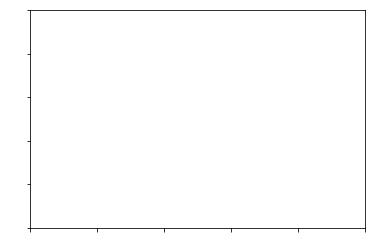

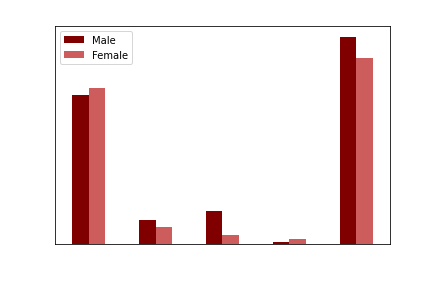

In [ ]:
def visual1(visual):
  plt.rcParams['text.color'] = 'black'
  plt.yticks(color = 'white')
  plt.xticks(color = "white")
  newvis.plot.bar(x="Category", y=["Male","Female"], color=['maroon','indianred'], rot=0)
  plt.xlabel('Type of Botulism Infection', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.ylabel('Number of Cases', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.title('Number of Cases per Type of Infection, 2017', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.tick_params(axis='x', colors='white')
  plt.tick_params(axis='y', colors='white')
  plt.savefig('2017caseswGender.png')
  plt.show()

############ Function Call ############
visual1(newvis)

### Visualization 1 Explanation

Our first Visualization displays the Number of Cases per Type of Infection, 2017 using our dataframe created in insight 2. This visulaization breaks down data about gender and each different case type. It shows that there is realatively little different between each type of infection and gender.

Here it's important to note that many of the features on this visualization were made to be white so that the plot stood out more on our darker-backgrounded presentation.

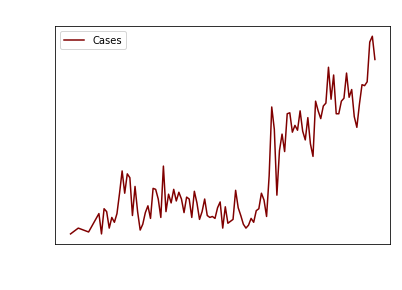

In [ ]:
 def visual2(df):
  df = pd.read_csv("downloaddata2.csv")
  df = df.groupby("Year").agg({"Count":"sum"}).reset_index()
  df = df.rename(columns = {"Count":"Cases"})
  df.plot(kind='line',x='Year',y='Cases', color='maroon')
  plt.title('Years')
  plt.yticks(color = 'white')
  plt.xticks([1900,1920,1940,1960,1980,2000,2020], color = "white")
  plt.xlabel('Year', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.ylabel('Number of Cases', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.title('Number of Cases per Year', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.tick_params(axis='x', colors='white')
  plt.tick_params(axis='y', colors='white')
  plt.savefig('totCasesperYear.png')
  plt.show()

##################
visual2(df)

### Visualization 2 Explanation

Our second visualization displays data from our 2nd csv file. First, data from our second csv file was grouped by year and the count of total cases was found for each year by summing the number of cases in all states per year. Then we created a visualization to show the number of Botulism cases per year in the United States from 1900 to 2017. 

Here it's important to note that many of the features on this visualization were made to be white so that the plot stood out more on our darker-backgrounded presentation.

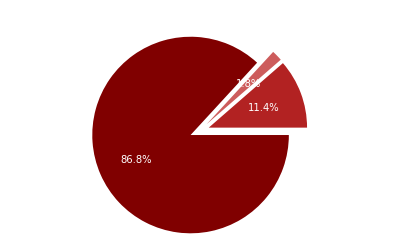

In [ ]:
def visual3(df):
  plt.rcParams['text.color'] = 'white'
  my_colors = ['firebrick','indianred','maroon']
  my_explode = (0.1, 0.1, 0.1)
  plt.pie(df["Cases"],labels=df["Disease"],autopct='%1.1f%%', colors = my_colors, explode = my_explode)
  plt.title('Ratios of Case Types', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.axis('equal')
  plt.savefig('ratiosOfCaseTypes.png')
  plt.show()

###################

visual3(piedf)

### Visualization 3 Explanation
Our third visualization displays data from our 4th insight. We created a visualization to show the ratios of different case types out of the total. This visualization shows information extrapolated about the amount of each type of botulism occured in California from 2001 to 2019 in total.

Here it's important to note that many of the features on this visualization were made to be white so that the plot stood out more on our darker-backgrounded presentation.

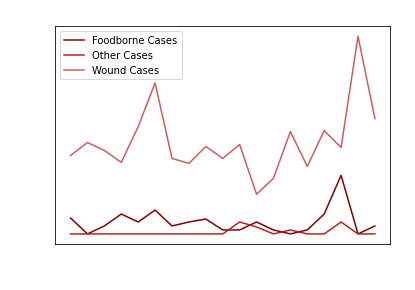

In [ ]:
def visual4(dflist):
  ax1 = plt.gca()
  plt.rcParams['text.color'] = 'black'
  dflist[0].plot(kind='line',x='Year',y='Foodborne Cases', color='maroon', ax = ax1)
  dflist[1].plot(kind='line',x='Year',y='Other Cases', color='firebrick', ax=ax1)
  dflist[2].plot(kind='line',x='Year',y='Wound Cases', color='indianred', ax=ax1)
  plt.title('Years')
  plt.yticks(color = 'white')
  plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017,2019], color = "white")
  plt.xlabel('Year', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.ylabel('Number of Cases', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.title('Number of Cases per Year in California', fontweight='bold', color = 'white', fontsize='17', horizontalalignment='center')
  plt.tick_params(axis='x', colors='white')
  plt.tick_params(axis='y', colors='white')
  plt.savefig('NumberofCasesperYearCali.png')
  plt.show()

###################

visual4(dflist)

### Visualization 4 Explanation

Our final visualization was created to show the Number of Cases per year of each type of Botulism. This graph allows for further comparison between the types of botulism, and re-emphasizes that wound-caused botulism is the most commonly occuring type of botulism. This visualization was created with data from our fifth insight. 

Here it's important to note that many of the features on this visualization were made to be white so that the plot stood out more on our darker-backgrounded presentation.

## Summary File

In [7]:
def summary1():
  outdf = insight1()
  outdf.to_csv("summaryfile")
  
############ Function Call ############
summary1()

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   https://matplotlib.org/stable/users/index.html



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link
https://youtu.be/5J74fEOogIo 


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
